In [ ]:
# %%capture

!pip install unsloth # install unsloth
!pip install --force-reinstall --no-cache-dir --no-deps git+https://github.com/unslothai/unsloth.git # Also get the latest version Unsloth!

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.7/192.7 kB 15.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 101.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

  Cloning https://github.com/unslothai/unsloth.git to /tmp/pip-req-build-_59l3_w6
  Running command git clone --filter=blob:none --quiet https://github.com/unslothai/unsloth.git /tmp/pip-req-build-_59l3_w6
  Resolved https://github.com/unslothai/unsloth.git to commit 2ff5dc1a8de1614994a275785b7b64fb4db8cb5d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for unsloth: filename=unsloth-2025.3.19-py3-none-any.whl size=192249 sha256=01c9635cb115702b315be792db20643e1378c71f558296d9477a1329ad02e90f
  Stored in directory: /tmp/pip-ephem-wheel-cache-t8etdnk2/wheels/d1/17/05/850ab10c33284a4763b0595cd8ea9d01fce6e221cac24b3c01
Successfully built unsloth
  Attempting uninstall: unsloth
    Found existing installation: unsloth 2025.3.19
    Uninstalling unsloth-2025.3.19:
      Successfully uninstalled unsloth-2025.3.19


In [ ]:
!pip install datasets

In [ ]:
# Modules for fine-tuning
from unsloth import FastLanguageModel
import torch # Import PyTorch
from trl import SFTTrainer # Trainer for supervised fine-tuning (SFT)
from unsloth import is_bfloat16_supported # Checks if the hardware supports bfloat16 precision
# Hugging Face modules
from huggingface_hub import login # Lets you login to API
from transformers import TrainingArguments # Defines training hyperparameters
from datasets import load_dataset # Lets you load fine-tuning datasets
# Import weights and biases
import wandb
# Import kaggle secrets
#from kaggle_secrets import UserSecretsClient

In [ ]:
from datasets import load_dataset

In [ ]:
# Set parameters
max_seq_length = 2048 # Define the maximum sequence length a model can handle (i.e. how many tokens can be processed at once)
dtype = None # Set to default
load_in_4bit = True # Enables 4 bit quantization — a memory saving optimization

# Load the DeepSeek R1 model and tokenizer using unsloth — imported using: from unsloth import FastLanguageModel
model, tokenizer = FastLanguageModel.from_pretrained(
    model_name="unsloth/DeepSeek-R1-Distill-Llama-8B",  # Load the pre-trained DeepSeek R1 model (8B parameter version)
    max_seq_length=max_seq_length, # Ensure the model can process up to 2048 tokens at once
    dtype=dtype, # Use the default data type (e.g., FP16 or BF16 depending on hardware support)
    load_in_4bit=load_in_4bit # Load the model in 4-bit quantization to save memory
)

==((====))==  Unsloth 2025.3.18: Fast Llama patching. Transformers: 4.50.0.
   \\   /|    Tesla T4. Num GPUs = 1. Max memory: 14.741 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 7.5. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = FALSE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


model.safetensors:   0%|          | 0.00/5.96G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/236 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/53.0k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [ ]:
# Define a system prompt under prompt_style
prompt_style = """Below is an instruction that describes a task, paired with an input that provides further context.
Write a response that appropriately completes the request.
Before answering, think carefully about the question and create a step-by-step chain of thoughts to ensure a logical and accurate response.

### Instruction:
You are a legal expert. Provide accurate, well-reasoned legal insights using proper legal terminology.
Maintain a professional, objective tone. Be specific about which laws or legal principles apply.
Explain the tenant's rights, cite the relevant statute(s), and give a clear legal opinion.
When unsure, advise consulting a qualified attorney.

### Question:
{}

### Response:
<think>{}"""

In [ ]:
# Creating a test medical question for inference
question = """I am in full term employment in the UK. My notice period set out in my contract is 3 months. There is no probation period (I know this is unusual).
I have only been working for 10 weeks and have handed in my notice. My employer is insisting I work for the full 3 months to hire my replacement.
There is someone else in my team at the same level who does the same job. Do I have any options to work a shorter notice period?"""

# Enable optimized inference mode for Unsloth models (improves speed and efficiency)
FastLanguageModel.for_inference(model)  # Unsloth has 2x faster inference!

# Format the question using the structured prompt (`prompt_style`) and tokenize it
inputs = tokenizer([prompt_style.format(question, "")], return_tensors="pt").to("cuda")  # Convert input to PyTorch tensor & move to GPU

# Generate a response using the model
outputs = model.generate(
    input_ids=inputs.input_ids, # Tokenized input question
    attention_mask=inputs.attention_mask, # Attention mask to handle padding
    max_new_tokens=1200, # Limit response length to 1200 tokens (to prevent excessive output)
    use_cache=True, # Enable caching for faster inference
)

# Decode the generated output tokens into human-readable text
response = tokenizer.batch_decode(outputs)

# Extract and print only the relevant response part (after "### Response:")
print(response[0].split("### Response:")[1])


<think>
Okay, so I'm trying to help this user who's in a bit of a tough spot with their employer in the UK. Let me break down their situation and figure out the best way to advise them.

First, the user is in full-term employment with a 3-month notice period. They've only been working for 10 weeks and have already given their notice. However, their employer is insisting they work the full 3 months to hire their replacement. That seems a bit harsh, especially since the user mentions there's another team member at the same level doing the same job. 

I know that in the UK, employment contracts are usually governed by the Employment Rights Act 1998. The key here is to see if the notice period can be considered a fixed term or if it's a basic employment contract. If it's a fixed-term contract, the employer might have more leeway to require the employee to work the full notice period. But if it's a basic contract, the employer might not be able to enforce the full notice if the employee ha

In [ ]:
# Updated training prompt style to add </think> tag
train_prompt_style = """Below is an instruction that describes a task, paired with an input that provides further context.
Write a response that appropriately completes the request.
Before answering, think carefully about the question and create a step-by-step chain of thoughts to ensure a logical and accurate response.

### Instruction:
You are a legal expert. Read the tenant's legal question and provide an answer based on applicable laws.
Be specific about which laws or legal principles apply.
Explain the tenant's rights, cite the relevant statute(s), and give a clear legal opinion.
When unsure, advise consulting a qualified attorney.

### Question:
{}

### Response:
<think>{}"""

In [ ]:
!pip install hf_transfer

In [ ]:
# Download the dataset using Hugging Face — function imported using from datasets import load_dataset
# ['all', 'r_legaladvice', 'courtlistener_docket_entry_documents', 'atticus_contracts', 'courtlistener_opinions', 'federal_register',
# 'bva_opinions', 'us_bills', 'cc_casebooks', 'tos', 'euro_parl', 'nlrb_decisions', 'scotus_oral_arguments', 'cfr', 'state_codes', 'scotus_filings',
# 'exam_outlines', 'edgar', 'cfpb_creditcard_contracts', 'constitutions', 'congressional_hearings', 'oig', 'olc_memos', 'uscode', 'founding_docs',
# 'ftc_advisory_opinions', 'echr', 'eurlex', 'tax_rulings', 'un_debates', 'fre', 'frcp', 'canadian_decisions', 'eoir', 'dol_ecab', 'icj-pcij', 'uspto_office_actions',
# 'ed_policy_guidance', 'acus_reports', 'hhs_alj_opinions', 'sec_administrative_proceedings', 'fmshrc_bluebooks', 'resource_contracts', 'medicaid_policy_guidance',
# 'irs_legal_advice_memos', 'doj_guidance_documents']
dataset = load_dataset("pile-of-law/pile-of-law", 'r_legaladvice', split = "train[0:10000]",trust_remote_code=True)
dataset

Loading Dataset Infos from /root/.cache/huggingface/modules/datasets_modules/datasets/pile-of-law--pile-of-law/c1090502f95031ebfad49ede680394da5532909fa46b7a0452be8cddecc9fa60
INFO:datasets.info:Loading Dataset Infos from /root/.cache/huggingface/modules/datasets_modules/datasets/pile-of-law--pile-of-law/c1090502f95031ebfad49ede680394da5532909fa46b7a0452be8cddecc9fa60
Overwrite dataset info from restored data version if exists.
INFO:datasets.builder:Overwrite dataset info from restored data version if exists.
Loading Dataset info from /root/.cache/huggingface/datasets/pile-of-law___pile-of-law/r_legaladvice/0.0.0/c1090502f95031ebfad49ede680394da5532909fa46b7a0452be8cddecc9fa60
INFO:datasets.info:Loading Dataset info from /root/.cache/huggingface/datasets/pile-of-law___pile-of-law/r_legaladvice/0.0.0/c1090502f95031ebfad49ede680394da5532909fa46b7a0452be8cddecc9fa60
Found cached dataset pile-of-law (/root/.cache/huggingface/datasets/pile-of-law___pile-of-law/r_legaladvice/0.0.0/c1090502f9

Dataset({
    features: ['text', 'created_timestamp', 'downloaded_timestamp', 'url'],
    num_rows: 10000
})

In [ ]:
dataset['text'][9999]

'Title: Please help us help my father. Arrested off international flight, taken.\nQuestion:My father was returning from an international trip with my brother, his wife and my mother.  When they reached customs after touching down in Chicago, an Officer ask him to produce ID, then took him.  He texted my mom shortly after:\n\n"being held for extradition to Virginia for charges, go on, i love you"\n\nThat was Friday at 4PM.  All he has is a bag of dirty clothes and diapers for my niece.  He doesn\'t have his medications!!\n\nSat at 11PM - he calls me collect from cook county jail.  he knows NOTHING.\n\nSun 6AM - he calls my mom, pleading to help him, he\'s terrified, apparently still in chicago prison\n\nI\'ve emailed his attorney to no effect (will obv try to keep calling)  I did some research and it looks like Virginia sent him a summons for a Grand Jury on 8/14.  They send it to an old address of his, so he was out of the country when the event occurred, making him look like he was on

In [ ]:
import re
from collections import Counter
import numpy as np

def extract_location_geotext(text):
    places = GeoText(text)
    return places.cities[0] if places.cities else None  # Keep only the first location found

def extract_location_info(dataset):
    locations = []

    for entry in dataset:
        text = entry.get('text', '')  # Get text, default to empty string if missing
        match = extract_location_geotext(text)

        if match:
            locations.append(match)

    return locations

def count_location_instances(dataset):
    locations = extract_location_info(dataset)
    return Counter(locations)

locations = extract_location_info(dataset)
location_counts = count_location_instances(dataset)
print(location_counts)  # Output: Counter({'New York': X, 'Los Angeles': Y, 'Chicago': Z})

Counter({'Texas': 325, 'Florida': 316, 'Most': 212, 'Of': 160, 'New York': 155, 'Michigan': 130, 'Ontario': 121, 'Virginia': 119, 'Oregon': 101, 'Colorado': 98, 'Police': 96, 'March': 96, 'Washington': 95, 'Best': 77, 'Missouri': 75, 'Chicago': 69, 'Maryland': 63, 'Los Angeles': 56, 'Oklahoma': 43, 'University': 43, 'Kansas': 39, 'Iowa': 33, 'Federal': 29, 'Same': 28, 'Houston': 28, 'Seattle': 23, 'Austin': 22, 'Atlanta': 21, 'San Diego': 20, 'Philadelphia': 20, 'Bay': 19, 'Man': 18, 'Along': 17, 'Much': 17, 'Denver': 16, 'Montana': 16, 'Miami': 15, 'Dallas': 14, 'Toronto': 14, 'Las Vegas': 13, 'Delaware': 13, 'Portland': 13, 'Boston': 13, 'Bar': 12, 'Brooklyn': 12, 'Baltimore': 12, 'Phoenix': 11, 'Union': 11, 'San Francisco': 11, 'Buy': 11, 'London': 10, 'Male': 9, 'Columbus': 9, 'York': 9, 'Honda': 9, 'Minneapolis': 9, 'Mobile': 9, 'Victoria': 9, 'Wyoming': 8, 'Pittsburgh': 8, 'Indianapolis': 8, 'Spring': 8, 'Reading': 8, 'Toyota': 8, 'Manhattan': 7, 'Kansas City': 7, 'Oakland': 7, '

In [ ]:
!pip install gpd

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.9/153.9 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 64.4 MB/s eta 0:00:00
  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1256 sha256=8ca9dd2708af78b2e06545297d04392a3583d02122557dc4a390370138b73b39
  Stored in directory: /root/.cache/pip/wheels/d4/c8/5b/b5be9c20e5e4503d04a6eac8a3cd5c2393505c29f02bea0960
Successfully built bs4
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.10.6
    Uninstalling pydantic-2.10.6:
      Successfully uninstalled pydantic-2.10.6
ERROR: pip's dependency resolver does not curre

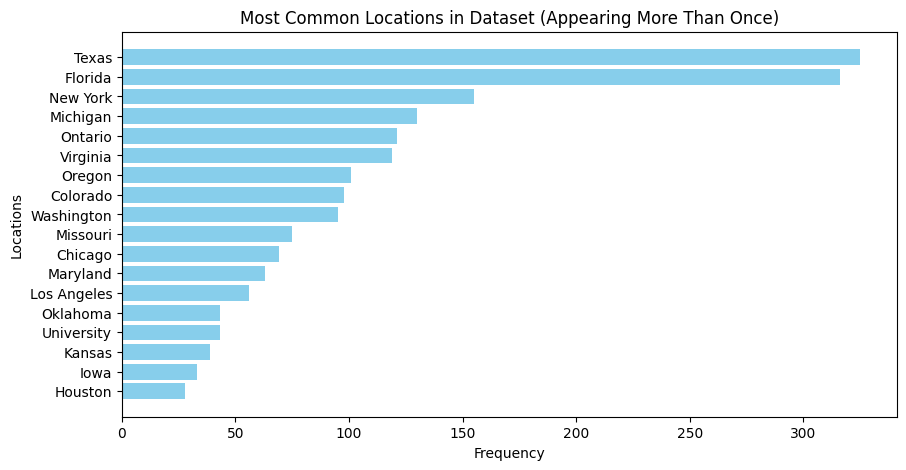

In [ ]:
def plot_location_bar_chart(dataset):
    location_counts = count_location_instances(dataset)
    filtered_location_counts = {location: count for location, count in location_counts.items() if count > 25 and location not in ['March', 'Man', 'Male', 'Most', 'Of', 'Best', 'Bar', 'Same', 'Along', 'Peace', 'Federal', 'Police']}

    if not filtered_location_counts:
        print("No location appears more than once.")
        return

    # Sort by count in descending order
    sorted_location_counts = dict(sorted(filtered_location_counts.items(), key=lambda item: item[1], reverse=True))

    locations, counts = zip(*sorted_location_counts.items())

    plt.figure(figsize=(10, 5))
    plt.barh(locations, counts, color='skyblue')
    plt.xlabel("Frequency")
    plt.ylabel("Locations")
    plt.title("Most Common Locations in Dataset (Appearing More Than Once)")
    plt.gca().invert_yaxis()
    plt.show()

# Example usage:
plot_location_bar_chart(dataset)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


['landlord', 'car', 'lot', 'dog', 'hair', 'child', 'paycheck', 'airport', 'edit', 'gt', 'coworker', 'case', 'opinions', 'classes', 'friend', 'girlfriend', 'mom', 'friend', 'property', 'night', 'dog', 'release', 'cousin', 'car', 'books', 'lights', 'job', 'rx', 'relationship', 'summons', 'partnership', 'cemetery', 'wife', 'registration', 'court', 'suspension', 'record', 'shepherd', 'college', 'building', 'pets', 'store', 'poster', 'property', 'dj', 'talk', 'letter', 'job', 'death', 'contract', 'electricity', 'case', 'report', 'caught', 'police', 'price', 'details', 'room', 'stuff', 'glasses', 'maternity', 'check', 'receptionists', 'car', 'name', 'posts', 'house', 'company', 'insurance', 'company', 'car', 'school', 'cps', 'visits', 'car', 'phone', 'sign', 'driver', 'vaccines', 'cps', 'insurance', 'rehearsal', 'messages', 'rent', 'hours', 'pension', 'life', 'unemployment', 'school', 'clock', 'extension', 'lease', 'company', 'volunteer', 'husband', 'stepdad', 'cops', 'guidance', 'phone', 's

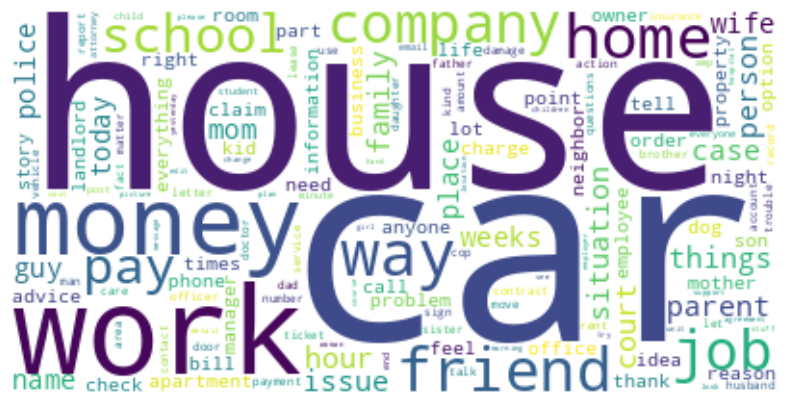

In [ ]:
import re
from collections import Counter
from geotext import GeoText
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk import pos_tag, word_tokenize
import nltk

nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('punkt')
nltk.download('punkt_tab')

def extract_text_before_answer(text):
    return text.split('Answer')[0].strip() if 'Answer' in text else text

def extract_location_geotext(text):
    places = GeoText(text)
    return places.cities[0] if places.cities else None  # Keep only the first location found

def extract_location_info(dataset):
    locations = []

    for entry in dataset:
        text = extract_text_before_answer(entry.get('text', ''))  # Extract text before 'Answer'
        match = extract_location_geotext(text)

        if match:
            locations.append(match)

    return locations

def count_location_instances(dataset):
    locations = extract_location_info(dataset)
    return Counter(locations)

def extract_focus_word(text):
    stop_words = set(stopwords.words('english')) | {'question', 'date', 'title', 'day', 'year', 'month', 'time', 'week', 'years', 'days', 'thing', 'anything', 'months', 'people', 'someone', 'help', 'lawyer', 'law', 'something', 'state', 'nothing', 'get'}
    words = word_tokenize(extract_text_before_answer(text).lower())
    words = [word for word in words if word.isalpha() and word not in stop_words]  # Remove non-alphabetic words and stopwords
    nouns = [word for word, pos in pos_tag(words) if pos in ['NN', 'NNS']]  # Keep only nouns
    word_counts = Counter(nouns)
    return word_counts.most_common(1)[0][0] if word_counts else None

def get_focus_per_sample(dataset):
    return [extract_focus_word(entry.get('text', '')) for entry in dataset]

def plot_wordcloud(dataset):
    all_text = ' '.join(extract_text_before_answer(entry.get('text', '')) for entry in dataset)
    stop_words = set(stopwords.words('english')) | {'question', 'date', 'title', 'day', 'year', 'month', 'time', 'week', 'years', 'days', 'thing', 'anything', 'months', 'people', 'someone', 'help', 'lawyer', 'law', 'something', 'state', 'nothing', 'get'}
    words = word_tokenize(all_text.lower())
    words = [word for word in words if word.isalpha() and word not in stop_words]  # Remove non-alphabetic words and stopwords
    nouns = [word for word, pos in pos_tag(words) if pos in ['NN', 'NNS']]  # Keep only nouns
    wordcloud = WordCloud(stopwords=stop_words, background_color='white').generate(' '.join(nouns))

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# Example usage
datas = [
    {'text': 'This legal case involves contract disputes and obligations under federal law. Answer: The ruling was based on prior cases.'},
    {'text': 'Intellectual property rights are the main concern in this lawsuit. Answer: The defendant won the case.'},
    {'text': 'The focus is on criminal law and prosecution procedures. Answer: Sentencing was determined by precedent.'},
    {'text': 'Employment law violations are discussed in this case. Answer: The court ruled in favor of the plaintiff.'},
    {'text': 'A dispute over property law and ownership rights is at stake. Answer: The judge dismissed the claim.'}
]

focus_words = get_focus_per_sample(dataset)
print(focus_words)  # Outputs the main focus word per sample

plot_wordcloud(dataset)


In [ ]:
import pandas as pd

# Convert dataset to pandas DataFrame
df = pd.DataFrame(dataset)

# Display the first few rows of the DataFrame
print(df.head())

# Get a summary of statistics for numerical columns (if any)
print(df.describe())

# Get information about the DataFrame (e.g., column types, non-null counts)
print(df.info())

                                                text created_timestamp  \
0  Title: Landlord broke lease agreement, what ar...        10-25-2016   
1  Title: I think someone is breaking into my car...        11-03-2018   
2  Title: MA - Just found out I might not be able...        08-25-2017   
3  Title: I adopted a dog. They said they gave me...        04-24-2019   
4  Title: (New Jersey) Denied haircut at a Barber...        10-27-2018   

  downloaded_timestamp                                                url  
0           11-09-2021  https://www.reddit.com/r/legaladvice/comments/...  
1           09-28-2021  https://www.reddit.com/r/legaladvice/comments/...  
2           10-02-2021  https://www.reddit.com/r/legaladvice/comments/...  
3           09-27-2021  https://www.reddit.com/r/legaladvice/comments/...  
4           09-28-2021  https://www.reddit.com/r/legaladvice/comments/...  
                                                     text created_timestamp  \
count               

In [ ]:
!pip install geotext
!pip install numpy

In [ ]:
from geotext import GeoText

def extract_location_geotext(text):
    places = GeoText(text)
    return places.cities  # Returns detected city names

# Example usage
text = "I visited New York and then went to Los Angeles."
print(extract_location_geotext(text))  # Output: ['New York', 'Los Angeles']


['New York', 'Los Angeles']


In [ ]:
# We need to format the dataset to fit our prompt training style
EOS_TOKEN = tokenizer.eos_token  # Define EOS_TOKEN which the model when to stop generating text during training
EOS_TOKEN

'<｜end▁of▁sentence｜>'

In [ ]:
import re

# Define formatting prompt function
def formatting_prompts_func(example):  # Takes a batch of dataset examples as input
    parsed = []  # Initializes an empty list to store the formatted prompts

    for text in example['text']:
      question_match = re.search(r"Question:(.+?)Answer #1:", text, re.DOTALL)
      question = question_match.group(1).strip() if question_match else None

      # Extract first answer
      answer_match = re.search(r"Answer #1:(.+)", text, re.DOTALL)
      answer = answer_match.group(1).strip() if answer_match else None

      text = train_prompt_style.format(question, answer) + EOS_TOKEN  # Insert values into prompt template & append EOS token
      parsed.append(text)  # Add the formatted text to the list

    return {
        "text": parsed,  # Return the newly formatted dataset with a "text" column containing structured prompts
    }

In [ ]:
# Update dataset formatting
dataset_finetune = dataset.map(formatting_prompts_func, batched = True)
dataset_finetune["text"][0]

Map:   0%|          | 0/500 [00:00<?, ? examples/s]

Caching processed dataset at /root/.cache/huggingface/datasets/pile-of-law___pile-of-law/r_legaladvice/0.0.0/c1090502f95031ebfad49ede680394da5532909fa46b7a0452be8cddecc9fa60/cache-8836de5bb822b3b0.arrow
INFO:datasets.arrow_dataset:Caching processed dataset at /root/.cache/huggingface/datasets/pile-of-law___pile-of-law/r_legaladvice/0.0.0/c1090502f95031ebfad49ede680394da5532909fa46b7a0452be8cddecc9fa60/cache-8836de5bb822b3b0.arrow


"Below is an instruction that describes a task, paired with an input that provides further context.\nWrite a response that appropriately completes the request.\nBefore answering, think carefully about the question and create a step-by-step chain of thoughts to ensure a logical and accurate response.\n\n### Instruction:\nYou are a legal expert. Read the tenant's legal question and provide an answer based on applicable laws.\nBe specific about which laws or legal principles apply.\nExplain the tenant's rights, cite the relevant statute(s), and give a clear legal opinion.\nWhen unsure, advise consulting a qualified attorney.\n\n### Question:\nOur landlord has been promising us a washer/dryer unit since we moved in (July 2015). When we resigned the lease August 2016, we wrote into the lease that an in-unit washer and dryer would be installed by September 30th 2016.\n\nSince September 30th, there have been continuous delays in getting the W/D installed. Since it has now been almost a month 

In [ ]:
# Apply LoRA (Low-Rank Adaptation) fine-tuning to the model
model_lora = FastLanguageModel.get_peft_model(
    model,
    r=16,  # LoRA rank: Determines the size of the trainable adapters (higher = more parameters, lower = more efficiency)
    target_modules=[  # List of transformer layers where LoRA adapters will be applied
        "q_proj",   # Query projection in the self-attention mechanism
        "k_proj",   # Key projection in the self-attention mechanism
        "v_proj",   # Value projection in the self-attention mechanism
        "o_proj",   # Output projection from the attention layer
        "gate_proj",  # Used in feed-forward layers (MLP)
        "up_proj",    # Part of the transformer’s feed-forward network (FFN)
        "down_proj",  # Another part of the transformer’s FFN
    ],
    lora_alpha=16,  # Scaling factor for LoRA updates (higher values allow more influence from LoRA layers)
    lora_dropout=0,  # Dropout rate for LoRA layers (0 means no dropout, full retention of information)
    bias="none",  # Specifies whether LoRA layers should learn bias terms (setting to "none" saves memory)
    use_gradient_checkpointing="unsloth",  # Saves memory by recomputing activations instead of storing them (recommended for long-context fine-tuning)
    random_state=3407,  # Sets a seed for reproducibility, ensuring the same fine-tuning behavior across runs
    use_rslora=False,  # Whether to use Rank-Stabilized LoRA (disabled here, meaning fixed-rank LoRA is used)
    loftq_config=None,  # Low-bit Fine-Tuning Quantization (LoFTQ) is disabled in this configuration
)

Unsloth 2025.3.18 patched 32 layers with 32 QKV layers, 32 O layers and 32 MLP layers.


In [ ]:
# Initialize the fine-tuning trainer — Imported using from trl import SFTTrainer
trainer = SFTTrainer(
    model=model_lora,  # The model to be fine-tuned
    tokenizer=tokenizer,  # Tokenizer to process text inputs
    train_dataset=dataset_finetune,  # Dataset used for training
    dataset_text_field="text",  # Specifies which field in the dataset contains training text
    max_seq_length=max_seq_length,  # Defines the maximum sequence length for inputs
    dataset_num_proc=2,  # Uses 2 CPU threads to speed up data preprocessing

    # Define training arguments
    args=TrainingArguments(
        per_device_train_batch_size=2,  # Number of examples processed per device (GPU) at a time
        gradient_accumulation_steps=4,  # Accumulate gradients over 4 steps before updating weights
        num_train_epochs=1, # Full fine-tuning run
        warmup_steps=5,  # Gradually increases learning rate for the first 5 steps
        max_steps=60,  # Limits training to 60 steps (useful for debugging; increase for full fine-tuning)
        learning_rate=2e-4,  # Learning rate for weight updates (tuned for LoRA fine-tuning)
        fp16=not is_bfloat16_supported(),  # Use FP16 (if BF16 is not supported) to speed up training
        bf16=is_bfloat16_supported(),  # Use BF16 if supported (better numerical stability on newer GPUs)
        logging_steps=10,  # Logs training progress every 10 steps
        optim="adamw_8bit",  # Uses memory-efficient AdamW optimizer in 8-bit mode
        weight_decay=0.01,  # Regularization to prevent overfitting
        lr_scheduler_type="linear",  # Uses a linear learning rate schedule
        seed=3407,  # Sets a fixed seed for reproducibility
        output_dir="outputs",  # Directory where fine-tuned model checkpoints will be saved
    ),
)


Process #0 will write at /root/.cache/huggingface/datasets/pile-of-law___pile-of-law/r_legaladvice/0.0.0/c1090502f95031ebfad49ede680394da5532909fa46b7a0452be8cddecc9fa60/cache-273ca6206758bceb_00000_of_00002.arrow
INFO:datasets.arrow_dataset:Process #0 will write at /root/.cache/huggingface/datasets/pile-of-law___pile-of-law/r_legaladvice/0.0.0/c1090502f95031ebfad49ede680394da5532909fa46b7a0452be8cddecc9fa60/cache-273ca6206758bceb_00000_of_00002.arrow
Process #1 will write at /root/.cache/huggingface/datasets/pile-of-law___pile-of-law/r_legaladvice/0.0.0/c1090502f95031ebfad49ede680394da5532909fa46b7a0452be8cddecc9fa60/cache-273ca6206758bceb_00001_of_00002.arrow
INFO:datasets.arrow_dataset:Process #1 will write at /root/.cache/huggingface/datasets/pile-of-law___pile-of-law/r_legaladvice/0.0.0/c1090502f95031ebfad49ede680394da5532909fa46b7a0452be8cddecc9fa60/cache-273ca6206758bceb_00001_of_00002.arrow
Spawning 2 processes
INFO:datasets.arrow_dataset:Spawning 2 processes


Unsloth: Tokenizing ["text"] (num_proc=2):   0%|          | 0/500 [00:00<?, ? examples/s]

Caching processed dataset at /root/.cache/huggingface/datasets/pile-of-law___pile-of-law/r_legaladvice/0.0.0/c1090502f95031ebfad49ede680394da5532909fa46b7a0452be8cddecc9fa60/cache-273ca6206758bceb_00000_of_00002.arrow
INFO:datasets.arrow_dataset:Caching processed dataset at /root/.cache/huggingface/datasets/pile-of-law___pile-of-law/r_legaladvice/0.0.0/c1090502f95031ebfad49ede680394da5532909fa46b7a0452be8cddecc9fa60/cache-273ca6206758bceb_00000_of_00002.arrow
Caching processed dataset at /root/.cache/huggingface/datasets/pile-of-law___pile-of-law/r_legaladvice/0.0.0/c1090502f95031ebfad49ede680394da5532909fa46b7a0452be8cddecc9fa60/cache-273ca6206758bceb_00001_of_00002.arrow
INFO:datasets.arrow_dataset:Caching processed dataset at /root/.cache/huggingface/datasets/pile-of-law___pile-of-law/r_legaladvice/0.0.0/c1090502f95031ebfad49ede680394da5532909fa46b7a0452be8cddecc9fa60/cache-273ca6206758bceb_00001_of_00002.arrow
Concatenating 2 shards
INFO:datasets.arrow_dataset:Concatenating 2 shard

In [ ]:
# Start the fine-tuning process
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 500 | Num Epochs = 1 | Total steps = 60
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 41,943,040/8,000,000,000 (0.52% trained)
wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: adityapmogare (adityapmogare-a-self-guru) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Unsloth: Will smartly offload gradients to save VRAM!


Step,Training Loss
10,2.889200
20,2.129700
30,2.034400
40,2.010100
50,1.958800
60,2.019100


In [ ]:
question = """Our landlord has been promising us a washer/dryer unit since we moved in (July 2015). When we resigned the lease August 2016,
we wrote into the lease that an in-unit washer and dryer would be installed by September 30th 2016.Since September 30th, there have been continuous
delays in getting the W/D installed. Since it has now been almost a month past the date the W/D was supposed to be installed, I am wondering what
types of rights as a tenant I have? Thanks ahead of time for any and all advice given."""

# Load the inference model using FastLanguageModel (Unsloth optimizes for speed)
FastLanguageModel.for_inference(model_lora)  # Unsloth has 2x faster inference!

# Tokenize the input question with a specific prompt format and move it to the GPU
inputs = tokenizer([prompt_style.format(question, "")], return_tensors="pt").to("cuda")

# Generate a response using LoRA fine-tuned model with specific parameters
outputs = model_lora.generate(
    input_ids=inputs.input_ids,          # Tokenized input IDs
    attention_mask=inputs.attention_mask, # Attention mask for padding handling
    max_new_tokens=1200,                  # Maximum length for generated response
    use_cache=True,                        # Enable cache for efficient generation
)

# Decode the generated response from tokenized format to readable text
response = tokenizer.batch_decode(outputs)

# Extract and print only the model's response part after "### Response:"
print(response[0].split("### Response:")[1])


<think>&gt;When we resigned the lease August 2016, we wrote into the lease that an in-unit washer and dryer would be installed by September 30th 2016.

&gt;Since September 30th, there have been continuous delays in getting the W/D installed.

&gt;Since it has now been almost a month past the date the W/D was supposed to be installed, I am wondering what types of rights as a tenant I have?

You can sue your landlord for breach of contract.  Your lease is a contract and your landlord has not fulfilled their obligations.  The lease should also specify the consequences of not fulfilling obligations, such as eviction or financial penalties.<｜end▁of▁sentence｜>


In [ ]:
model.save_pretrained("legal_deepseek_model_01")  # Local saving
tokenizer.save_pretrained("legal_deepseek_model_tokenizer")

('legal_deepseek_model_tokenizer/tokenizer_config.json',
 'legal_deepseek_model_tokenizer/special_tokens_map.json',
 'legal_deepseek_model_tokenizer/tokenizer.json')